# Tutorial: Clasificador kNN (k-Nearest Neighbors)

### 1.1 Fundamentos de la técnica

El algoritmo **k-Nearest Neighbors (kNN)** es un método **de aprendizaje supervisado no paramétrico**, utilizado tanto para **clasificación** como para **regresión**.  

Se basa en el principio de que los objetos similares se encuentran cerca entre sí en el espacio de características.  
Para clasificar una nueva muestra, el algoritmo:
1. Calcula la **distancia** entre la muestra y todos los puntos de entrenamiento.
2. Selecciona los **k vecinos más cercanos**.
3. Asigna la clase más frecuente entre esos vecinos.

Ventajas:
- Sencillo de entender e implementar.
- No requiere entrenamiento explícito (lazy learning).
- Flexible (puede usar diferentes métricas de distancia).

Desventajas:
- Costoso en tiempo de predicción (requiere comparar con todos los datos).
- Sensible a escalas y valores atípicos.

### 1.2 Modelo Matemático del Perceptrón

Dado un conjunto de entrenamiento:

$$D = \{ (\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), ..., (\mathbf{x}_n, y_n) \}$$

y un nuevo patrón $\mathbf{x}_{\text{nuevo}}$, el algoritmo:

1. Calcula la **distancia** entre $\mathbf{x}_{\text{nuevo}}$ y cada $\mathbf{x}_i$:

$$d(\mathbf{x}_{\text{nuevo}}, \mathbf{x}_i) = \sqrt{ \sum_{j=1}^{m} (x_{\text{nuevo},j} - x_{i,j})^2 }$$

2. Selecciona los **k vecinos más cercanos** con menor distancia.

3. Asigna la clase según la **mayoría de votos**:

$$y_{\text{pred}} = \operatorname{mode}(y_i \text{ de los } k \text{ vecinos más cercanos})$$

El parámetro **k** controla la suavidad del modelo:
- Valores pequeños → modelo más sensible al ruido.
- Valores grandes → mayor suavizado (puede perder detalle).

### 1.3 Descripción de la librería, clases, funciones (python) empleadas en programar el Perceptrón; en su sección respectiva

Usaremos las siguientes librerías:

- **numpy**: cálculos numéricos.  
- **pandas**: análisis y manejo de datos tabulares.  
- **matplotlib**: visualización de gráficos.  
- **seaborn**: visualización estadística.  
- **sklearn.datasets**: para cargar datasets.  
- **sklearn.model_selection**: para dividir datos en entrenamiento y prueba.  
- **sklearn.neighbors**: implementación del clasificador **KNeighborsClassifier**.  
- **sklearn.metrics**: métricas de evaluación como **confusion_matrix** y **accuracy_score**.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

### 1.4. Pipeline del Perceptrón

A continuación, se implementan las etapas del proceso de aprendizaje supervisado.

### 1.4.1 Preprocesamiento

Se carga el dataset Iris y se convierte en un DataFrame de pandas, agregando una columna target con las etiquetas de cada muestra. Luego se muestran las primeras filas para visualizar la estructura de los datos y sus características y se generan estadísticas descriptivas del dataset, mostrando medidas como promedio, desviación estándar, valores mínimo y máximo, y percentiles para cada característica, lo que permite entender la distribución y rango de los datos y se muestra un grafico de dispersion.

In [10]:
# Cargar dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Mostrar primeras filas
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Estadísticas básicas del dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


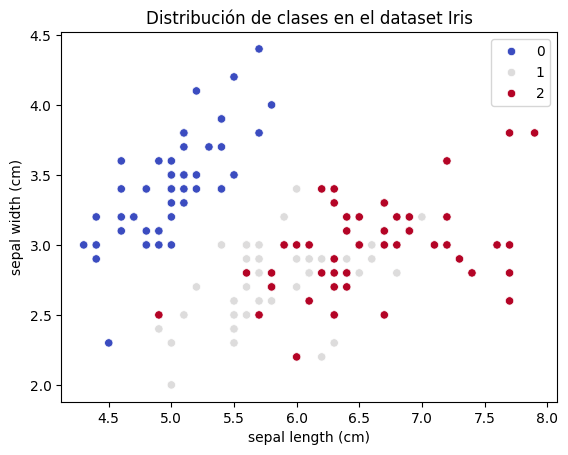

In [12]:
# Gráfico de dispersión usando dos características
sns.scatterplot(x=iris.data[:, 0], y=iris.data[:, 1], hue=iris.target, palette='coolwarm')
plt.title("Distribución de clases en el dataset Iris")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


#### 1.4.2 Feature Engineering

Seleccionamos las características más informativas del dataset.  
En este caso, utilizaremos las cuatro variables originales del conjunto Iris:

- Sepal length (longitud del sépalo)  
- Sepal width (ancho del sépalo)  
- Petal length (longitud del pétalo)  
- Petal width (ancho del pétalo)

Luego, dividimos los datos en conjuntos de entrenamiento y prueba.

Para explorar visualmente los datos, se combina el conjunto de entrenamiento con las etiquetas y se utiliza Seaborn (sns) para crear un pairplot, que muestra la distribución y las relaciones entre todas las variables predictoras, coloreando los puntos según la clase.

Conjunto de entrenamiento: (105, 4)
Conjunto de prueba: (45, 4)


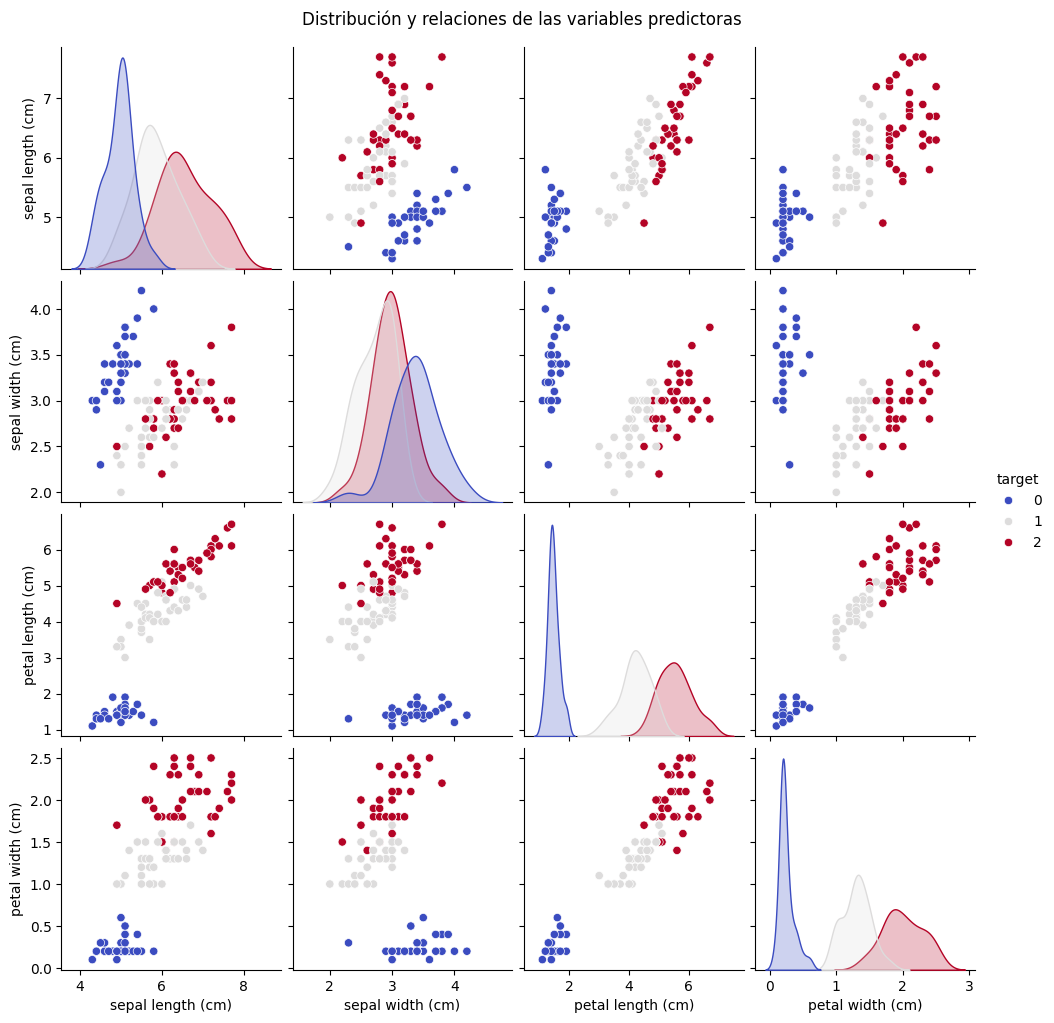

In [13]:
# Variables predictoras (X) y etiqueta (y)
X = df.iloc[:, :-1]
y = df['target']

# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")

# Visualización con Seaborn
# Combinar X_train y y_train para un DataFrame completo para graficar
train_df = X_train.copy()
train_df['target'] = y_train

# Pairplot para ver la relación entre todas las variables y la clase
sns.pairplot(train_df, hue='target', palette='coolwarm')
plt.suptitle("Distribución y relaciones de las variables predictoras", y=1.02)
plt.show()

### 1.4.3 Model Selection

El algoritmo kNN se basa en la premisa de que los datos con características similares tienden a pertenecer a la misma clase.
Es un método no paramétrico, lo que significa que no asume una forma funcional del modelo ni una distribución particular de los datos.
Esto lo hace muy útil en tareas donde la frontera de decisión puede ser no lineal o compleja.

#### 1.4.4 Model Training

Se crea un modelo k-Nearest Neighbors (kNN) con 5 vecinos y luego se entrena usando los datos de entrenamiento X_train y y_train, de manera que el modelo aprenda a clasificar nuevas muestras según la proximidad a los datos ya conocidos.



In [14]:
# Crear el modelo kNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 1.4.5 Prediction

La función clasificar_patron recibe un modelo entrenado y un patrón de datos, lo convierte en un DataFrame con los nombres de las columnas originales y realiza la predicción de la clase. Luego, muestra el patrón y la clase predicha en formato legible usando los nombres del dataset Iris. Finalmente, se muestra un ejemplo de uso clasificando la primera muestra del conjunto de prueba.

In [15]:
def clasificar_patron(model, patron):
    # Convertir el patrón a DataFrame con los nombres de las columnas originales
    patron_df = pd.DataFrame([patron], columns=X.columns)

    clase_pred = model.predict(patron_df)
    nombre_clase = iris.target_names[clase_pred[0]]

    print(f"Patrón: {patron}")
    print(f"Clase predicha: {nombre_clase}")

# Ejemplo de uso:
clasificar_patron(knn, X_test.iloc[0].values)


Patrón: [6.1 2.8 4.7 1.2]
Clase predicha: versicolor


#### 1.4.6 Model Evaluation

Evaluamos el desempeño del modelo con:
- **Matriz de Confusión**
- **Métrica de Accuracy**

Se realizan predicciones sobre el conjunto de prueba usando el modelo kNN y se calcula la matriz de confusión para evaluar cómo se clasificaron las muestras frente a sus etiquetas reales. Además, se calcula la exactitud (accuracy) del modelo. Finalmente, se visualiza la matriz de confusión con Seaborn (sns.heatmap), mostrando claramente qué clases fueron correctamente clasificadas y cuáles se confundieron, utilizando los nombres de las clases del dataset Iris.

Accuracy del modelo: 1.00


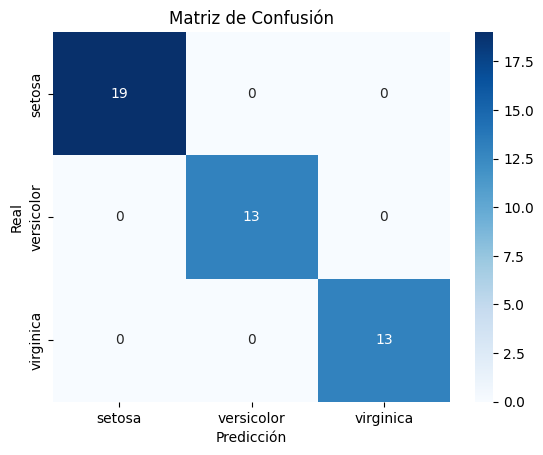

In [16]:
# Predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy del modelo: {acc:.2f}")

# Visualizar matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

##### Interpretación de Resultados

- La **matriz de confusión** muestra cuántas instancias fueron clasificadas correctamente o erróneamente por clase.
- El valor de **Accuracy** representa la proporción total de aciertos.

Si la precisión es alta (por ejemplo, > 0.9), el modelo está clasificando correctamente la mayoría de los patrones del conjunto de prueba.


### 1.5 Referencias bibliográficas
 
Scikit-learn Documentation: [https://scikit-learn.org/stable/modules/neighbors.html](https://scikit-learn.org/stable/modules/neighbors.html)  

¿Qué es k vecino más cercano (kNN)? | Una guía integral sobre k vecino más cercano. (s. f.). Elastic. https://www.elastic.co/es/what-is/knn

Daniel. (2023b, octubre 30). ¿Qué es el algoritmo KNN? DataScientest. https://datascientest.com/es/que-es-el-algoritmo-knn

Na, & Na. (2024, 30 octubre). Algoritmo K-Nearest Neighbor | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/